# Drug Overdose Deaths

Each year more than 170000 people die due to *Drug Overdose*, either accidental or intentional, all over the world. In this notebook I perform EDA on the OD data of Connecticut(state in USA) available from 2012-2018 and visualize the causes and location of deaths.

In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('drug_deaths.csv',index_col='Unnamed: 0')

In [2]:
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)
df.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,LocationifOther,DescriptionofInjury,InjuryPlace,InjuryCity,InjuryCounty,InjuryState,COD,OtherSignifican,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,NaN,NaN,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",NaN,0,0,1,0.0,0,0,0,1,1,0,0,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,FAIRFIELD,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Cocaine Intoxication,NaN,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,Hospital,NaN,Substance Abuse,Unknown,UNKNOWN,NaN,NaN,Acute Heroin and Cocaine Intoxication,NaN,1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,Hospital,NaN,substance abuse,Residence,RYE,NaN,NaN,Acute Fentanyl and Morphine Intoxication,NaN,1,0,1,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,FAIRFIELD,Hospital,NaN,Transdermal Absorption,Other,NaN,NaN,NaN,Fentanyl Intoxication,NaN,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


## Cleaning The Dataset

In [3]:
columns=df.columns
columns=columns[-21:-4]
for i in columns:
    print(df[i].unique())
    
#Converting to int type
df[columns[3]]=df[columns[3]].astype('int64')

#Taking only 0 and 1 values for cause of death as Yes or No
columns=columns[2],columns[12],columns[16]
for i in columns:
    for j in range(5105):
        if df.loc[j,i]=='0' or df.loc[j,i]==0:
            df.loc[j,i]=0
        else:
            df.loc[j,i]=1


[0 1]
[0 1]
['1' '0' '1-A' '1 POPS' '1 (PTCH)']
[0. 1.]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
['0' '1' '1ES' 'STOLE MEDS' 'NO RX BUT STRAWS' 'PCP NEG']
[0 1]
[nan 'Bupren' 'lsd, hydromorph' 'opiate' 'BUPREN' 'HYDROMORPH' 'OTHERS'
 'pcp' 'PCP' 'ketamine' 'meperidine' 'opiate screen' 'MDMA' 'COD' 'PAROX'
 'carfentanil' 'hydromorph' 'DUSTER' 'DIPHENHYDRAMINE' 'Buprenor'
 'HYDRO MORPH' 'BUPRE' 'MORPHINE' 'morphine' 'MORPH' 'hyd-morph' 'U47700'
 'DOX, DIPHEN' 'opiates' 'Buprenor, carfentanil' 'mdma' 'SERT'
 'TAPENTADOL' '4-anpp' 'methoxyPCP' 'N-ETHYL-PENTYLONE' 'PCP, HYDROMORPH'
 'Mirtagynine' 'UK' 'HYDROMORP' 'U-47700' 'difluro'
 'DIPHENHYDRAMINE, ZOLPIDEM' '4-ANPP' 'BUPRENORPHINE' 'Difluro' 'H-MORPH'
 'BUPRENORP' 'U-47700 synthetic opioid' 'OPIATE' 'Buprnor' 'morphine RX'
 'opioid' 'OPIOID NOS' 'BUPRENOR' 'CATHINONE' 'LOPERAMIDE' 'codeine' 'GHB'
 'hydromorp' 'BUTALBITAL' 'Morphine' 'PCP, N-ETHYL-PENTYLONE'
 'Bupren, HEXADRONE' 'bupren' 'HYDR-MOR' 'pos 6-mam' 'Rx morphine'
 'Bupr

In [4]:
#Count of deaths due to each drug
columns=df.columns
drugs={}
for i in range(-21,-7,1):
    s=df[columns[i]].sum()
    print(columns[i],s)
    drugs[columns[i]]=s
for i in range(-6,-4):
    s=df[columns[i]].sum()
    print(columns[i],s)
    drugs[columns[i]]=s

Heroin 2529
Cocaine 1521
Fentanyl 2232
Fentanyl_Analogue 389
Oxycodone 607
Oxymorphone 108
Ethanol 1247
Hydrocodone 118
Benzodiazepine 1343
Methadone 474
Amphet 159
Tramad 130
Morphine_NotHeroin 42
Hydromorphone 25
OpiateNOS 88
AnyOpioid 2466


### Cleaning the 'Other' column

In [5]:
df.groupby('Other').Other.count()

Other
2-A                           1
4-ANPP                        1
4-anpp                        3
BUPRE                         3
BUPREN                       24
BUPREN, DIFLUORO              1
BUPRENO                       4
BUPRENOR                      6
BUPRENORP                     1
BUPRENORPH                    1
BUPRENORPHINE                 1
BUPRENORPHONE                 1
BUTALB                        1
BUTALBITAL                    1
Bupren                       25
Bupren, HEXADRONE             1
Bupreno                       4
Buprenophine                  1
Buprenor                     10
Buprenor, carfentanil         1
Buprno                        1
Buprnor                       1
CATHINONE                     1
COD                           4
CODEINE                       1
Codeine                       1
DIFLOURO                      1
DIFLURO                       1
DIPHENH                       1
DIPHENHY                      1
DIPHENHYDRAMINE               2
DI

In [6]:
#Identifies and merges the same names with different spellings or errors in spellings
import fuzzywuzzy
from fuzzywuzzy import process

#Input:dataframe,column name, correct name, min similarity value, max similarity value and words to skip, in the order.
def replace_matches(df,column,string_to_match,min_ratio=50,max_ratio=100,leave=[]):
    strings=df[column].unique()
    matches=fuzzywuzzy.process.extract(string_to_match,strings,limit=10,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    close_matches=[match[0] for match in matches if match[1]>=min_ratio and match[1]<max_ratio and match[0] not in leave]
    rows=df[column].isin(close_matches)
    df.loc[rows,column]=string_to_match

df['Other']=df['Other'].str.lower()
df['Other']=df['Other'].str.strip()

In [7]:
other=df['Other'].unique()
#Getting word mattchings
matches=fuzzywuzzy.process.extract('buprenorphine',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
#Replacing the matches by correct word
replace_matches(df=df,column='Other',string_to_match='buprenorphine',min_ratio=61,leave=['morphine','morphiine','buprop','buprno'])
rows=df['Other'].isin(['buprenor, carfentanil','bupren, difluoro','bupre','bupren','pcp. bupren','bupren, hexadrone'])
df.loc[rows,'Other']='buprenorphine'

#Running for all the different words need to be corrected
matches=fuzzywuzzy.process.extract('hydromorphone',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
replace_matches(df=df,column='Other',string_to_match='hydromorphone',min_ratio=67,leave=['morphine'])
rows=df['Other'].isin(['hydrom','h-morph','hydromorph, buprenor','hyd-morph','hydr-mor'])
df.loc[rows,'Other']='hydromorphone'

matches=fuzzywuzzy.process.extract('morphine',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
replace_matches(df=df,column='Other',string_to_match='morphine',min_ratio=59,leave=['hydromorphone','buprenorphine','mitragine'])
rows=df['Other'].isin(['morphine, no rx in pmp','morphine no 6mam','morph/cod','morph pcp'])
df.loc[rows,'Other']='morphine'

matches=fuzzywuzzy.process.extract('opioid',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
replace_matches(df=df,column='Other',string_to_match='opioid',min_ratio=46,leave=['zolpidem','buprenorphine','morphine'])
rows=df['Other'].isin(['u-47700 synthetic opioid','opiate screen','u-47700','u-47700, carfentanil','u47700'])
df.loc[rows,'Other']='opioid'

matches=fuzzywuzzy.process.extract('zolpidem',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
replace_matches(df=df,column='Other',string_to_match='zolpidem',min_ratio=50,leave=['opioid','morphine'])

matches=fuzzywuzzy.process.extract('diphenhydramine',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
replace_matches(df=df,column='Other',string_to_match='diphenhydramine',min_ratio=56)
rows=df['Other'].isin(['diphen, chlorphen'])
df.loc[rows,'Other']='diphenhydramine'

matches=fuzzywuzzy.process.extract('phenobarbital',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
replace_matches(df=df,column='Other',string_to_match='phenobarbital',min_ratio=67)

matches=fuzzywuzzy.process.extract('difluorofentanyl',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
replace_matches(df=df,column='Other',string_to_match='difluorofentanyl',min_ratio=58,leave=['carfentanil'])

In [8]:
#Replacing remaining wrong words
rows=df['Other'].isin(['buprop','buprno'])
df.loc[rows,'Other']='bupropion'

rows=df['Other'].isin(['mdma, n-ethyl-pentylone','mdma, pcp'])
df.loc[rows,'Other']='mdma'

rows=df['Other'].isin(['butalb'])
df.loc[rows,'Other']='butalbital'

rows=df['Other'].isin(['cod'])
df.loc[rows,'Other']='codeine'  

rows=df['Other'].isin(['ket'])
df.loc[rows,'Other']='ketamine'

rows=df['Other'].isin(['parox'])
df.loc[rows,'Other']='paroxetine'

rows=df['Other'].isin(['pcp, n-ethyl-pentylone','n-ethyl-pentylone','methoxypcp','pcp, morphine nos'])
df.loc[rows,'Other']='pcp'

rows=df['Other'].isin(['mitragine','mirtagynine'])
df.loc[rows,'Other']='mitragynine'

rows=df['Other'].isin(['others'])
df.loc[rows,'Other']='unidentified'
df['Other']=df['Other'].str.title()
df=df.replace('Other','Unidentified')
df=df.replace('Unknown','Unidentified')

In [9]:
#Clean 'Other' column
df.groupby('Other').Other.count().sort_values()

Other
2-A                  1
Bath Salt            1
Topiramate           1
Snorted              1
Sert                 1
Quiet                1
Cathinone            1
Pseudo               1
Pos 6-Mam            1
Paroxetine           1
Uk                   2
Phenobarbital        2
Meperidine           2
Bupropion            2
Butalbital           2
Ghb                  2
Zolpidem             3
Mitragynine          3
4-Anpp               4
Tapentadol           4
Carfentanil          4
Unidentified         5
Diphenhydramine      6
Duster               6
Ketamine             7
Difluorofentanyl     9
Codeine              9
Mdma                 9
Hydromorphone       53
Opioid              54
Pcp                 68
Morphine            80
Buprenorphine       89
Name: Other, dtype: int64

In [10]:
#Merging all the drugs from the Dataset and the 'Other' column as a datasset
j=0
other=df['Other'].unique()
for i in df.groupby('Other').Other.count().sort_values(ascending=False):
    drugs[other[j]]=i
    j+=1
drugsdf=pd.DataFrame(drugs.items())
drugsdf=drugsdf.sort_values(by=[1],axis=0,ascending=False)
drugsdf.reset_index(drop=True)

,0,1
0,Heroin,2529
1,AnyOpioid,2466
2,Fentanyl,2232
3,Cocaine,1521
4,Benzodiazepine,1343
5,Ethanol,1247
6,Oxycodone,607
7,Methadone,474
8,Fentanyl_Analogue,389
9,Amphet,159


# Visualization

Text(0.5, 1.0, 'Deaths Due To Different Drugs')

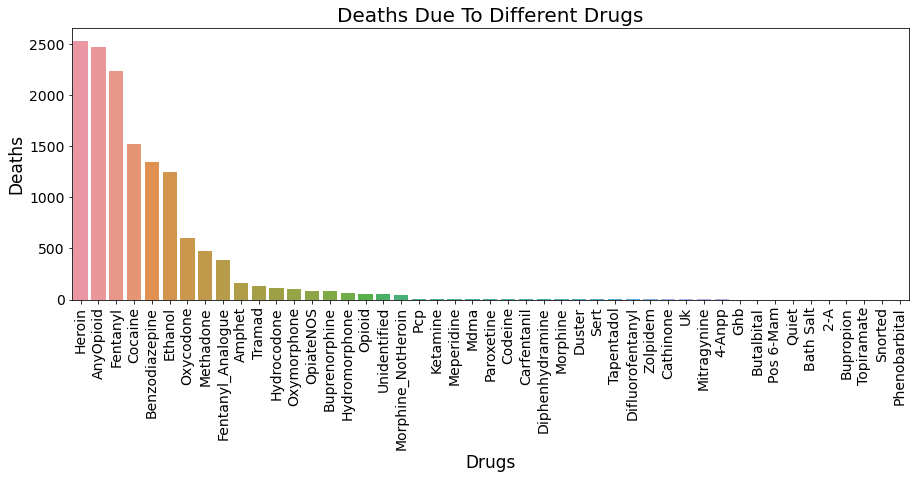

In [11]:
#No. of deaths caused by different drugs
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
sns.barplot(x=drugsdf[0],y=drugsdf[1],data=drugsdf)
plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
plt.xlabel('Drugs',size=17)
plt.ylabel('Deaths',size=17)
plt.title('Deaths Due To Different Drugs',size=20)

* Most deaths are caused by over dosing on Heroin and Opioids





        Date
2017.0  1038
2018.0  1018
2016.0   917
2015.0   727
2014.0   558
2013.0   490
2012.0   355


Text(0, 0.5, 'Deaths')

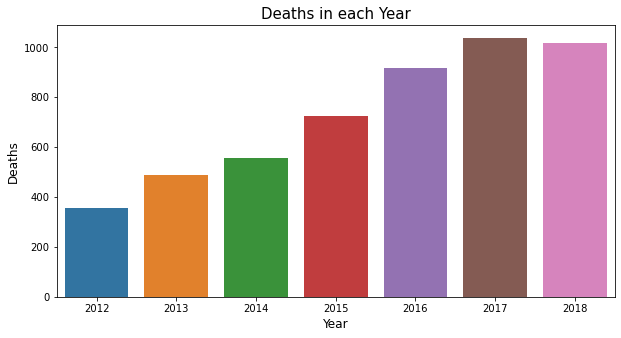

In [12]:
#Yearwise no. of deaths
plt.figure(figsize=(10,5))
year = pd.DataFrame(pd.to_datetime(df['Date']).dt.year.value_counts())
print(year)
sns.barplot(x=year.index.astype('int64'),y=year['Date'],data=year)
plt.title('Deaths in each Year',size=15)
plt.xlabel('Year',size=12)
plt.ylabel('Deaths',size=12)

* OD related deaths increase from 2012-2017 and then decrease for 2018

In [13]:
#Deaths of residents of different cities
city=pd.DataFrame(df['ResidenceCity'].value_counts())
city

,ResidenceCity
HARTFORD,296
WATERBURY,269
BRIDGEPORT,241
NEW HAVEN,224
NEW BRITAIN,192
BRISTOL,134
MERIDEN,127
NORWICH,109
MANCHESTER,103
TORRINGTON,100


Text(0.5, 1.0, 'Deaths of Residents of Top 40 cities')

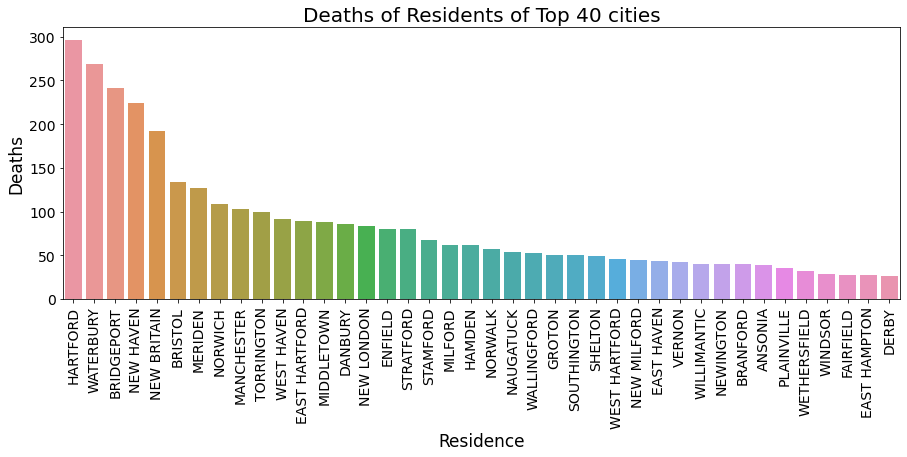

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=city.index[:40],y=city['ResidenceCity'][:40],data=drugsdf)
plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
plt.xlabel('Residence',size=17)
plt.ylabel('Deaths',size=17)
plt.title('Deaths of Residents of Top 40 cities',size=20)

In [15]:
#Deaths in different cities
death_city=pd.DataFrame(df['DeathCity'].value_counts())
death_city

,DeathCity
HARTFORD,563
NEW HAVEN,374
WATERBURY,368
BRIDGEPORT,341
NEW BRITAIN,227
MERIDEN,145
NORWICH,144
BRISTOL,144
NEW LONDON,137
DANBURY,131


Text(0.5, 1.0, 'Top 40 Cities with Highest no. of Reported Deaths')

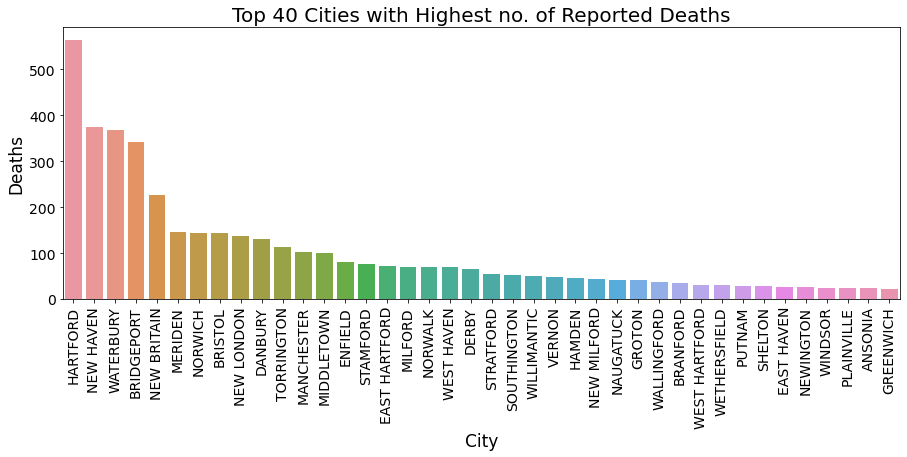

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=death_city.index[:40],y=death_city['DeathCity'][:40],data=death_city)
plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
plt.xlabel('City',size=17)
plt.ylabel('Deaths',size=17)
plt.title('Top 40 Cities with Highest no. of Reported Deaths',size=20)

* The residents of Hartford are reported the most, among the casualties.
* The highest no. of deaths occur in Hartford (much more than the no. of residents of Hartford reported dead).

([<matplotlib.patches.Wedge at 0x7f905e228910>,
 [Text(-1.4429570220316665, -1.355830016104344, 'Male'),
  Text(1.4429571489736284, 1.3558298810049507, 'Female')],
 [Text(-0.7870674665627272, -0.739543645147824, '74.01%  (3,773)'),
  Text(0.7870675358037973, 0.7395435714572458, '25.99%  (1,325)')])

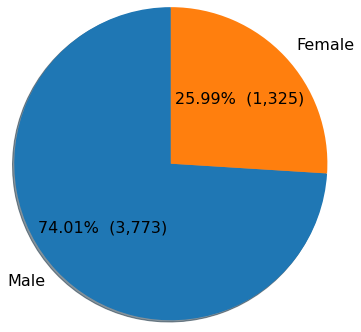

In [17]:
#Death distribution by sex ratio
male = df['Sex'].value_counts().values[0]
female = df['Sex'].value_counts().values[1]
plt.pie([male,female],labels=['Male','Female'],autopct= lambda x:'{:.2f}%  ({:,.0f})'.format(x,x*sum([male,female])/100),shadow=True, startangle=90,radius=1.8,textprops={'fontsize':16})

* As compared to women, men account for almost triple the no. of deaths.
* Can be due to the sex ratio or men consume more drugs or women are smarter and more aware while consuming drugs 😂

[nan 'Black' 'White' 'Asian, Other' 'Hispanic, White' 'Asian Indian'
 'Hispanic, Black' 'Unidentified' 'Chinese' 'Native American, Other'
 'Hawaiian']


Text(0.5, 1.0, 'Deaths Among Different Ethnicities')

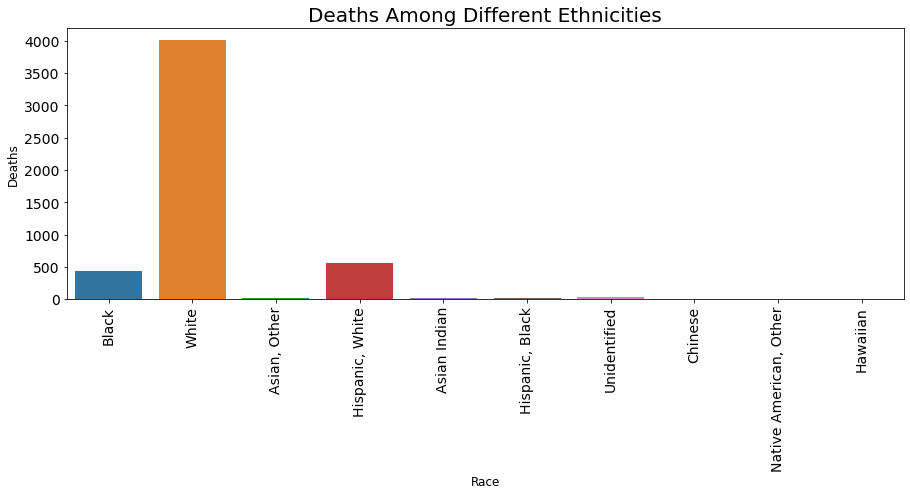

In [18]:
#Death distribution by race
print(df['Race'].unique())

plt.figure(figsize=(15,5))
sns.countplot(x='Race',data=df)
plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
plt.xlabel('Race',size=12)
plt.ylabel('Deaths',size=12)
plt.title('Deaths Among Different Ethnicities',size=20)

Text(0.5, 1.0, 'Death Distribution by Age')

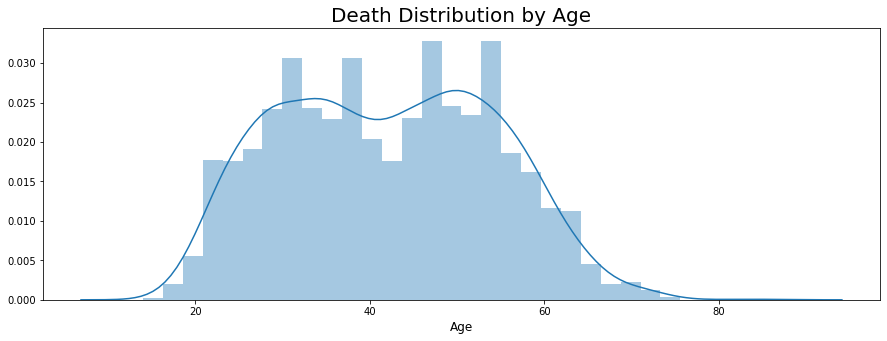

In [19]:
#Death distribution by age
df['Age']=df['Age'].replace('Unidentified',0)
plt.figure(figsize=(15,5))
sns.distplot(df['Age'])
plt.xlabel('Age',size=12)
plt.title('Death Distribution by Age',size=20)

* Drug overdose deaths peak around the age of 45, steeply rise during the 20's and then steeply decreases after the 50's

(-0.5, 2999.5, 1999.5, -0.5)

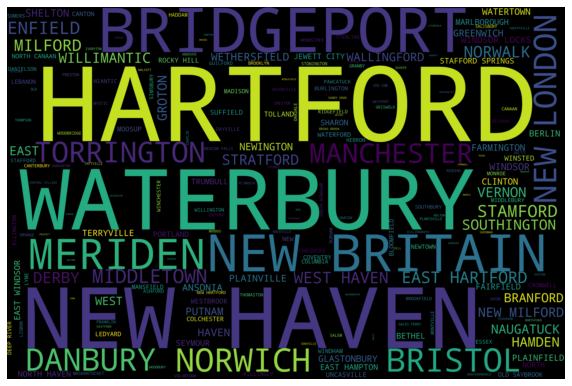

In [20]:
#Word Cloud
from wordcloud import WordCloud
death_city = df['DeathCity'].copy().dropna()
death_city_cloud = ' '.join(city for city in death_city)
plt.figure(figsize=(10,7))
wc=WordCloud(width=3000, height=2000).generate(death_city_cloud)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

* The word cloud shows the most affected cities

## This gives an idea as to where the authorities need to put their focus to reduce Drug Overdose related deaths. 

# Thank You 🙏